In [1]:
import sys
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
#X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
#X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
#Y_train = np_utils.to_categorical(Y_train)
#Y_test = np_utils.to_categorical(Y_test)
###

In [6]:
input_shape = (28, 28, 1)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)



X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

#print('X_train shape:', X_train.shape)
#print(X_train.shape[0], 'train samples')
#print(X_test.shape[0], 'test samples')


#num_classes = 10


Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

In [7]:
#교차검증 데이터셋 구성을 위해 데이터 합치기
X_data = np.concatenate((X_train, X_test), axis=0)
print(X_data.shape)
Y_data = np.concatenate((Y_train, Y_test), axis=0)
print(Y_data.shape)

(70000, 28, 28, 1)
(70000, 10)


In [8]:
#교차검증 데이터셋 7개로 나누기
skf = KFold(n_splits=7, shuffle=True)

accuracy = []



In [9]:
for train, validation in skf.split(X_data, Y_data):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='categorical_crossentropy', optimizer='adam',
                metrics=['accuracy'])

  # 학습 데이터를 이용해서 학습
  #model.fit(X_data[train], Y_data[train], epochs=2, batch_size=64)  
  hist = model.fit(X_data[train], Y_data[train], epochs=2, batch_size=64)

  # 테스트 데이터를 이용해서 검증
  k_accuracy = '%.4f' % (model.evaluate(X_data[validation], Y_data[validation])[1])
  accuracy.append(k_accuracy)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/2
60000/60000 [==============================] - 25s 413us/step - loss: 0.1732 - acc: 0.9475
Epoch 2/2
10000/10000 [==============================] - 1s 92us/step
Epoch 1/2
60000/60000 [==============================] - 24s 407us/step - loss: 0.1754 - acc: 0.94810s - loss: 0.1772 - ac
Epoch 2/2
10000/10000 [==============================] - 1s 95us/step
Epoch 1/2
60000/60000 [==============================] - 27s 445us/step - loss: 0.1808 - acc: 0.9470
Epoch 2/2
10000/10000 [==============================] - 1s 104us/step
Epoch 1/2
60000/60000 [==============================] - 27s 457us/step - loss: 0.1829 - acc: 0.9458
Epoch 2/2
10000/10000 [==============================] - 1s 109us/step
Epoch 1/2
60000/60000 [==============================] - 27s 442us/step - loss: 0.1787 - acc: 0.9459
Epoch 2/2
10000/10000 [==============================] - 1s 101us/step
Epoch 1/2
60000/600

In [12]:
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                401472    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 402,954
Trainable params: 402,954
Non-trainable params: 0
_________________________________________________________________


KeyError: 'val_loss'

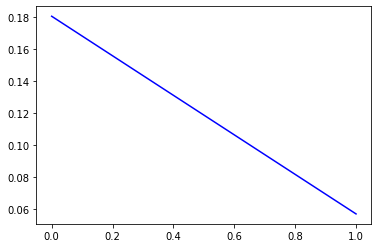

In [10]:
#loss graph 그리기

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

loss_ax.plot(hist.history['loss'], 'b', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='test loss')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper right')

plt.show()

In [11]:
print('\nK-fold cross validation Accuracy: {}'.format(accuracy))


K-fold cross validation Accuracy: ['0.9804', '0.9833', '0.9814', '0.9839', '0.9853', '0.9846', '0.9814']
